In [40]:
import matplotlib.pyplot as plt
from numpy import genfromtxt
import numpy as np

#class tools::wcsv::ntuple
#title Hits
#separator 44
#vector_separator 59
#column double mx_y
#column int track_id | electron == 1
#column int event_id
#column double delta_z
#column double delta_E
#column int type
#column int fdetected_sp
headers = ["mx_y", "track_id", "event_id", "delta_z", "delta_E", "type", "fdetected_sp"]

def search_for_thing(column, search_param, my_data):
    electron_array = []
    for i in range(len(my_data.T[0])):
        #print(i)
        if my_data.T[column][i] == search_param:
            electron_array.append(my_data[i])
    if len(electron_array) == 0:
        print("Couldn't find anything with", headers[column], f"= {search_param}")
    else: 
        print(headers[column], f" = {search_param}")
    return np.array(electron_array)


def find_electrons(my_data):
    arr = search_for_thing(5, 1, my_data) # look for electrons
    plt.scatter(arr.T[2], arr.T[1])
    plt.xlabel("event_id")
    plt.ylabel("track_id")
    plt.show()
    
def coincident_scatters(my_data, event_number, y_val = 3, lower = 2, upper = 11, ax = False, ax_name = plt):
    print(headers)
    # get only events with electrons
    arr = search_for_thing(5, 1, my_data)
    
    # get events with the desired event number
    arr = search_for_thing(2, event_number, arr)

    i = lower
    while i < upper: 
        arr1 = search_for_thing(1, i, arr)
        if arr1.any(): # if anything gets returned by arr1, then there is an electron in the event
            steps = np.linspace(0, len(arr1) - 1, len(arr1))
            ax_name.plot(steps, arr1.T[y_val][:len(steps)], label = f"{i}")
        i += 1

    if not ax:
        plt.title(f"Coincident electron {headers[y_val]} by track, event #{event_number}")
        plt.xlabel("steps")
        plt.ylabel(f"{headers[y_val]}")
        plt.legend()
        #plt.ylim(0, 5)
        
    if ax:
        ax_name.set_title(f"Coincident electron {headers[y_val]} by track, event #{event_number}")
        ax_name.set_xlabel("steps")
        ax_name.set_ylabel(f"{headers[y_val]}")
        ax_name.legend()
    

['mx_y', 'track_id', 'event_id', 'delta_z', 'delta_E', 'type', 'fdetected_sp']
type  = 1
event_id  = 5
track_id  = 2
track_id  = 3
track_id  = 4
track_id  = 5
track_id  = 6
track_id  = 7
track_id  = 8
track_id  = 9
track_id  = 10
['mx_y', 'track_id', 'event_id', 'delta_z', 'delta_E', 'type', 'fdetected_sp']
type  = 1
event_id  = 6
track_id  = 2
track_id  = 3
Couldn't find anything with track_id = 4
Couldn't find anything with track_id = 5
track_id  = 6
Couldn't find anything with track_id = 7
Couldn't find anything with track_id = 8
Couldn't find anything with track_id = 9
Couldn't find anything with track_id = 10
['mx_y', 'track_id', 'event_id', 'delta_z', 'delta_E', 'type', 'fdetected_sp']
type  = 1
event_id  = 15
track_id  = 2
Couldn't find anything with track_id = 3
Couldn't find anything with track_id = 4
Couldn't find anything with track_id = 5
Couldn't find anything with track_id = 6
Couldn't find anything with track_id = 7
Couldn't find anything with track_id = 8
track_id  = 9


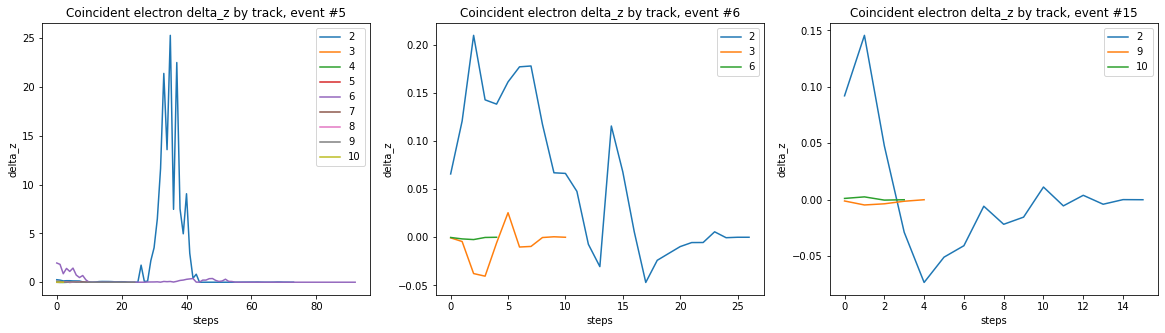

In [41]:
my_data = genfromtxt('trial_1_20_hits.csv', delimiter=',')
#find_electrons(my_data)

fig, ax = plt.subplots(1, 3, figsize = (20, 5))


coincident_scatters(my_data, 5, ax = True, ax_name = ax[0])
coincident_scatters(my_data, 6, ax = True, ax_name = ax[1])
coincident_scatters(my_data, 15, ax = True, ax_name = ax[2])

['mx_y', 'track_id', 'event_id', 'delta_z', 'delta_E', 'type', 'fdetected_sp']
track_id  = 2
event_id  = 5
track_id  = 6
event_id  = 5


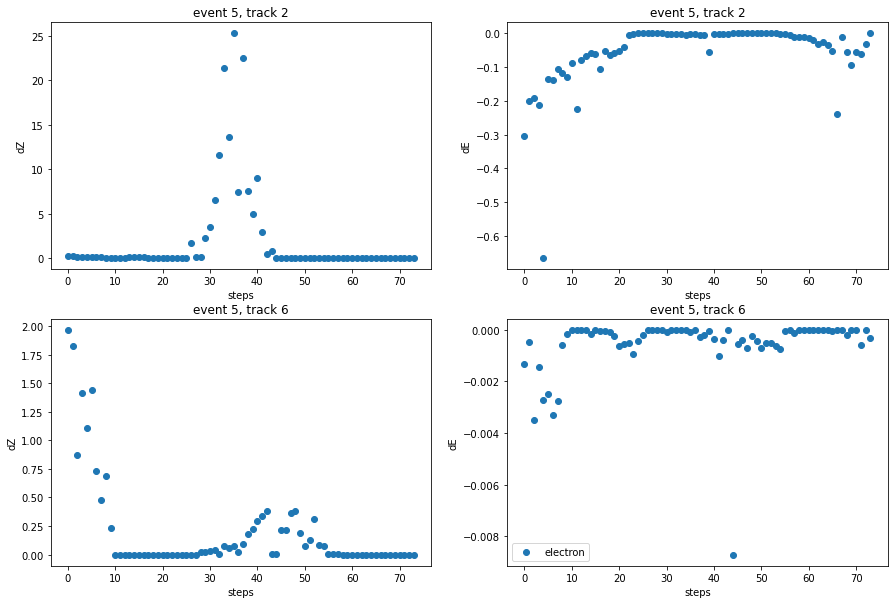

Coincident compton scatters in same event?


In [5]:
#my_data = genfromtxt('run_nt_Hits_t0.csv', delimiter=',')

fig, ax = plt.subplots(2, 2, figsize = (15, 10))

print(headers)

arr = search_for_thing(1, 2, my_data) # track ID = 2
arr = search_for_thing(2, 5, arr) # event ID = 5
steps = np.linspace(0, len(arr) - 1, len(arr))
ax[0][0].scatter(steps, arr.T[3], label = "electron")
ax[0][0].set_xlabel("steps")
ax[0][0].set_ylabel("dZ")
ax[0][0].set_title("event 5, track 2")
ax[0][1].scatter(steps, arr.T[4], label = "electron")
ax[0][1].set_xlabel("steps")
ax[0][1].set_ylabel("dE")
ax[0][1].set_title("event 5, track 2")



arr = search_for_thing(1, 6, my_data) # track ID = 2
arr = search_for_thing(2, 5, arr) # event ID = 5
#steps = np.linspace(0, len(arr) - 1, len(arr)) # make upper and lower plots the same length
ax[1][0].scatter(steps, arr.T[3][:len(steps)], label = "electron")
ax[1][0].set_xlabel("steps")
ax[1][0].set_ylabel("dZ")
ax[1][0].set_title("event 5, track 6")
ax[1][1].scatter(steps, arr.T[4][:len(steps)], label = "electron")
ax[1][1].set_xlabel("steps")
ax[1][1].set_ylabel("dE")
ax[1][1].set_title("event 5, track 6")


plt.legend()
plt.show()

print("Coincident compton scatters in same event?")
